# 高级分类器：支持向量机( SVM)与凸优化

加载数据集

In [2]:
%matplotlib inline
import os
import numpy as np
from scipy import stats
import pandas as pd
import sklearn.model_selection as cross_validation
import matplotlib.pyplot as plt

#os.chdir('Q:/data')
#pd.set_option('display.max_columns', None)

In [3]:
orgData = pd.read_csv('date_data2.csv')
orgData.describe()

,income,attractive,assets,edueduclass,Dated,income_rank,attractive_rank,assets_rank
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,9010.000000,50.500000,96.006300,3.710000,0.500000,1.550000,1.560000,1.510000
std,5832.675288,28.810948,91.082226,1.225116,0.502519,1.140397,1.103896,1.123621
min,3000.000000,1.000000,3.728400,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.000000,28.000000,31.665269,3.000000,0.000000,1.000000,1.000000,0.750000
50%,7500.000000,51.000000,70.746924,4.000000,0.500000,2.000000,2.000000,2.000000
75%,11500.000000,68.875000,131.481061,4.000000,1.000000,3.000000,2.250000,2.250000
max,34000.000000,99.500000,486.311758,6.000000,1.000000,3.000000,3.000000,3.000000


提取如下字段进行建模

In [4]:
X = orgData.ix[:, :4]
Y = orgData['Dated']

D:\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
D:\Anaconda\anaconda\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


构建训练集和测试集

In [5]:
train_data, test_data, train_target, test_target = cross_validation.train_test_split(
    X, Y, test_size=0.4, train_size=0.6, random_state=123)   #划分训练集和测试集

使用svm，建立支持向量机模型

In [6]:
from sklearn import svm

svcModel = svm.SVC(kernel='rbf', gamma=0.5, C=0.5, probability=True).fit(train_data, train_target)

初步评估

In [7]:
import sklearn.metrics as metrics

test_est = svcModel.predict(test_data)
print(metrics.classification_report(test_target, test_est))  # 计算评估指标

              precision    recall  f1-score   support

           0       0.45      1.00      0.62        18
           1       0.00      0.00      0.00        22

    accuracy                           0.45        40
   macro avg       0.23      0.50      0.31        40
weighted avg       0.20      0.45      0.28        40



D:\Anaconda\anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


进行标准化可以提升高斯核svm的表现

In [8]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

svcModel1 = svm.SVC(kernel='rbf', gamma=0.5, C=0.5, probability=True).fit(train_scaled, train_target)
test_est1 = svcModel1.predict(test_scaled)
print(metrics.classification_report(test_target, test_est1))  # 计算评估指标

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.91      0.95      0.93        22

    accuracy                           0.93        40
   macro avg       0.93      0.92      0.92        40
weighted avg       0.93      0.93      0.92        40



选择最优模型

In [10]:
from sklearn.model_selection import ParameterGrid, GridSearchCV

kernel = ('linear', 'rbf')
gamma = np.arange(0.01, 1, 0.1)
C = np.arange(0.01, 1.0, 0.1)
grid = {'gamma': gamma, 'C': C}

clf_search = GridSearchCV(estimator=svcModel1, param_grid=grid, cv=4)
clf_search.fit(train_scaled, train_target)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=0.5,
                           kernel='rbf', max_iter=-1, probability=True,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91]),
                         'gamma': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [11]:
best_model = clf_search.best_estimator_
test_est2 = best_model.predict(test_scaled)
print(metrics.classification_report(test_target, test_est2))  # 计算评估指标

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.92      1.00      0.96        22

    accuracy                           0.95        40
   macro avg       0.96      0.94      0.95        40
weighted avg       0.95      0.95      0.95        40



In [12]:
best_model

SVC(C=0.6100000000000001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.21000000000000002,
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

画出在svm模型中，两个变量的关系图，可以用于提升感性认识，但一般不能推广到大于两维的情况

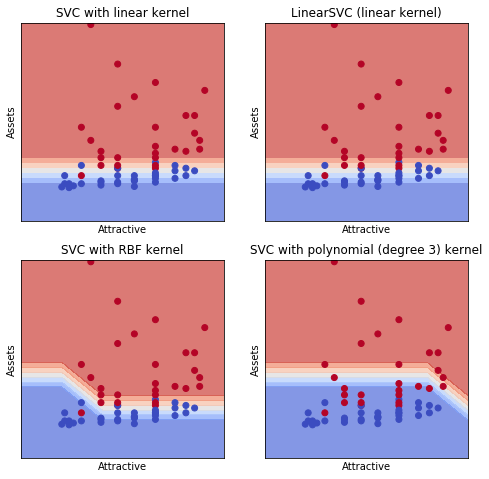

In [13]:
train_x = train_scaled[:, 1:3]
train_y = train_target.values
h = 1.0  # step size in the mesh
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(train_x, train_y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.5, C=1).fit(train_x, train_y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(train_x, train_y)
lin_svc = svm.LinearSVC(C=C).fit(train_x, train_y)

# create a mesh to plot in
x_min, x_max = train_x[:, 0].min() - 1, train_x[:, 0].max() + 1
y_min, y_max = train_x[:, 1].min() - 1, train_x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']
plt.figure(figsize=(8, 8))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.7)

    # Plot also the training points
    plt.scatter(train_x[:, 0], train_x[:, 1], c=train_y, cmap=plt.cm.coolwarm)
    plt.xlabel('Attractive')
    plt.ylabel('Assets')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()